___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram



from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [28]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'},
                   inplace=True)

In [31]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.shape

(200, 5)

In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [36]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [37]:
df.drop(columns="CustomerID", inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





<Axes: xlabel='Age', ylabel='Count'>

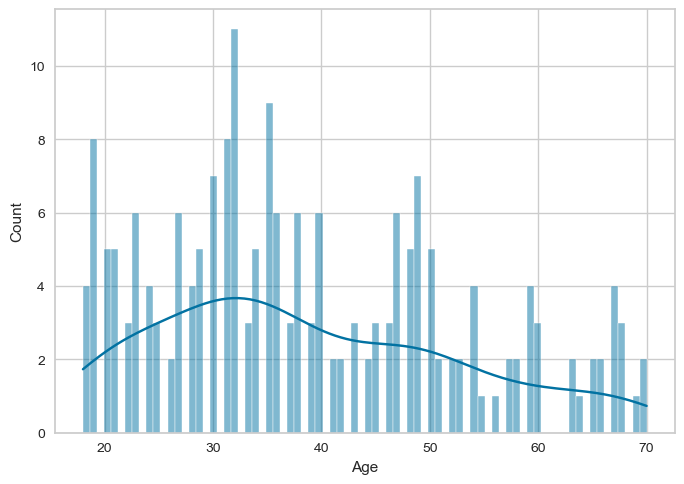

In [38]:
sns.histplot(data=df, x="Age", bins=80, kde=True)

<Axes: xlabel='Annual_Income', ylabel='Count'>

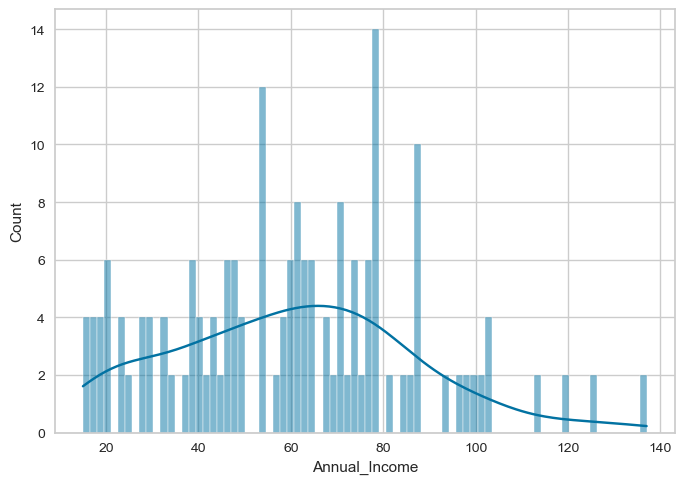

In [39]:
sns.histplot(data=df, x="Annual_Income", bins=80, kde=True)

<Axes: xlabel='Spending_Score', ylabel='Count'>

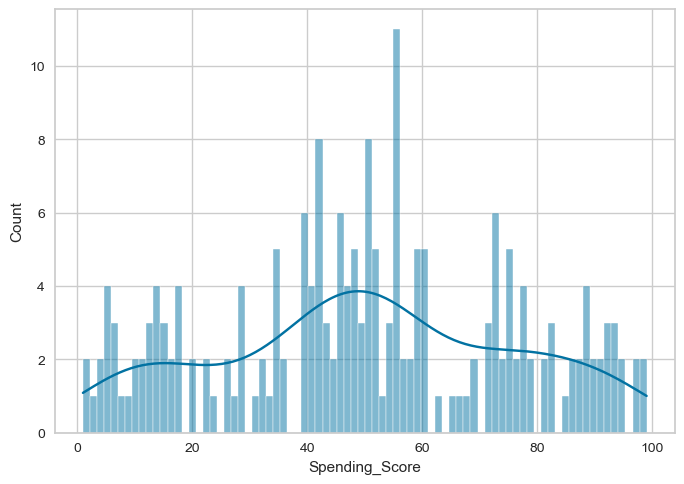

In [40]:
sns.histplot(data=df, x="Spending_Score", bins=80, kde=True)

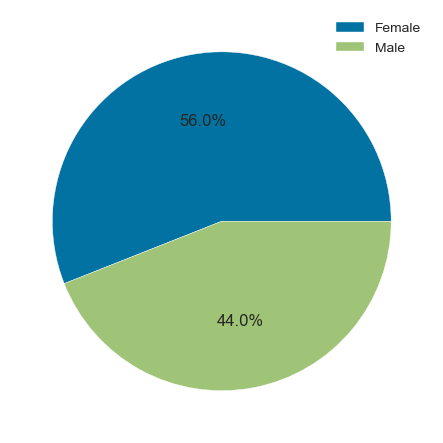

In [41]:
plt.pie(df.Gender.value_counts(), autopct='%1.1f%%')
plt.legend(labels=['Female', 'Male'])

<Axes: >

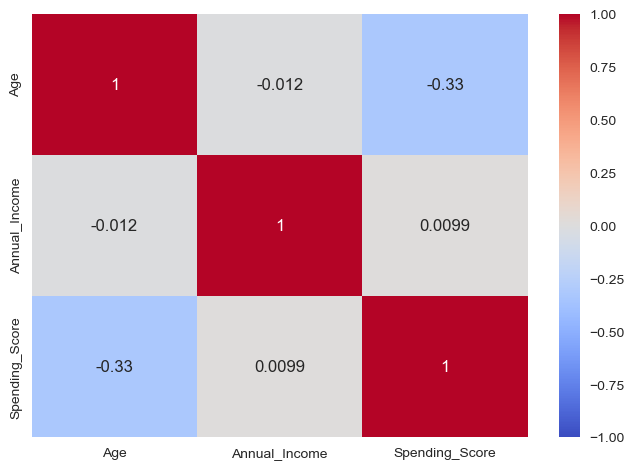

In [42]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

<Axes: xlabel='Spending_Score', ylabel='Gender'>

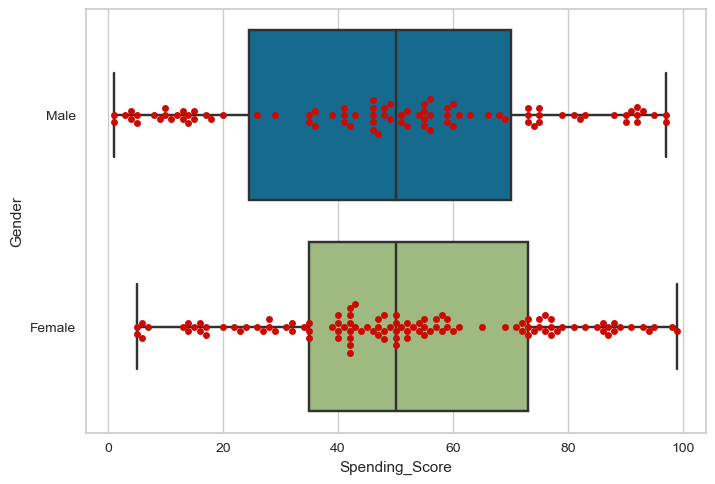

In [43]:
sns.swarmplot(x='Spending_Score', y='Gender', data=df, color="r")
sns.boxplot(x='Spending_Score', y='Gender', data=df)

<Axes: xlabel='Annual_Income', ylabel='Gender'>

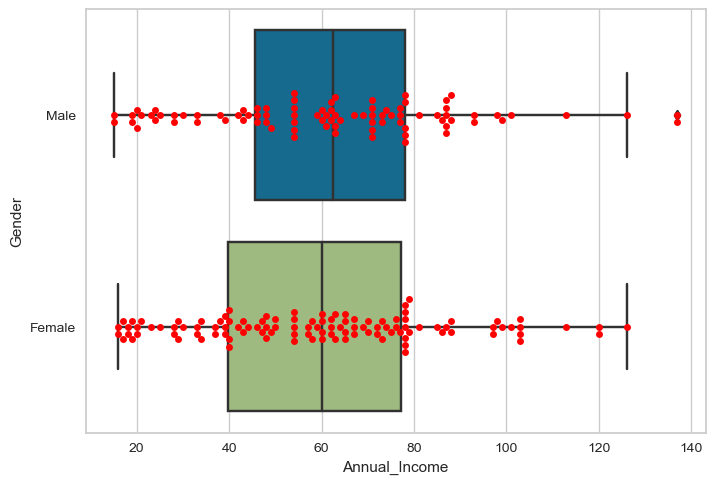

In [44]:
sns.swarmplot(x='Annual_Income', y='Gender', data=df, color="red")
sns.boxplot(x='Annual_Income', y='Gender', data=df)

<Axes: xlabel='Age', ylabel='Gender'>

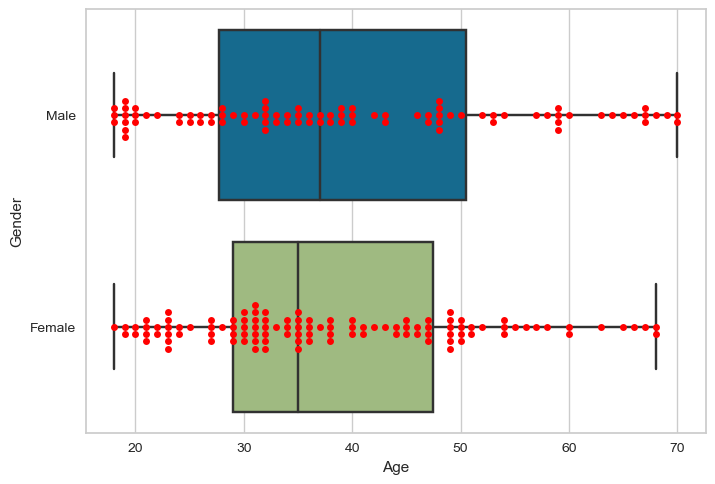

In [45]:
sns.swarmplot(x='Age', y='Gender', data=df, color="red")
sns.boxplot(x='Age', y='Gender', data=df)

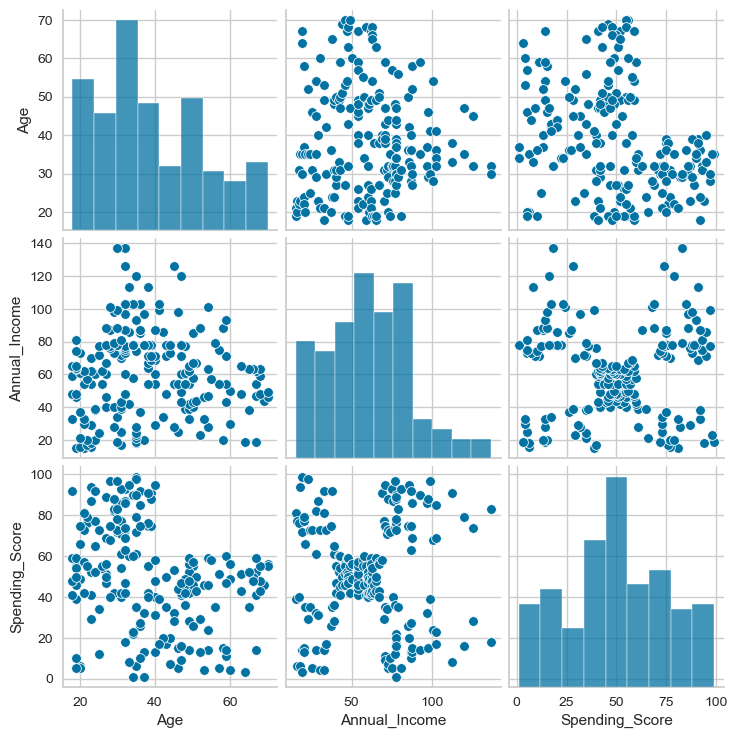

In [46]:
sns.pairplot(df)

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [47]:
df_c = df.drop(columns="Gender")

In [48]:
df_c

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [49]:
df_a_ss = df_c.drop(columns="Annual_Income")

In [50]:
df_a_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [51]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [52]:
hopkins(df_a_ss, 1)

0.6874555761629962

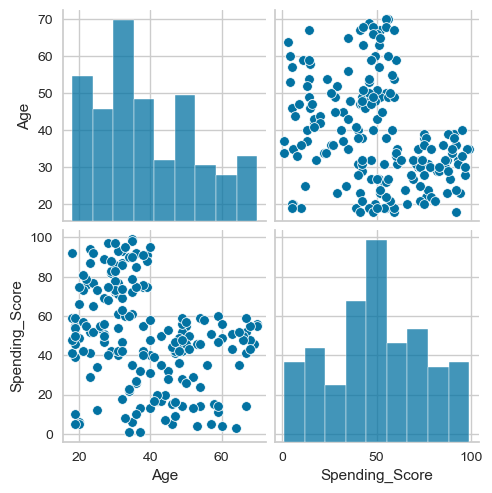

In [53]:
sns.pairplot(df_a_ss)

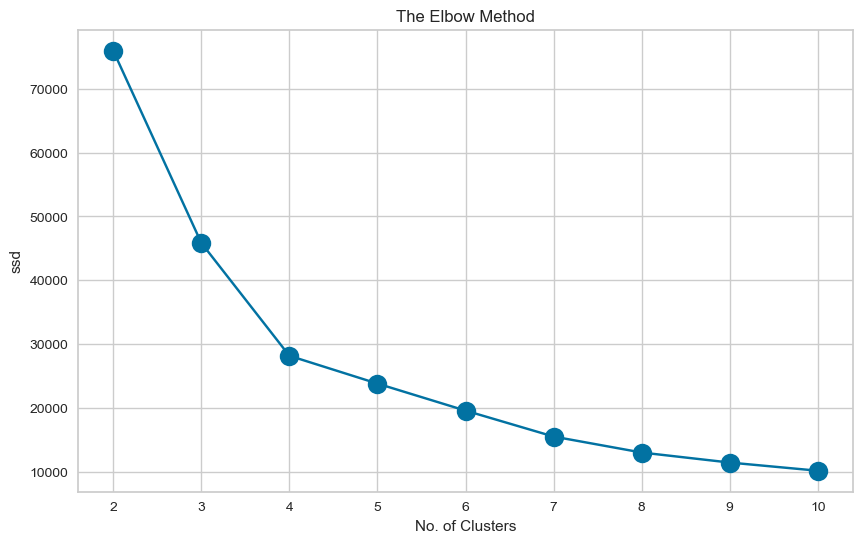

In [54]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=101)
    kmeans.fit(df_a_ss)
    ssd.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

Text(0.5, 1.0, 'elbow method')

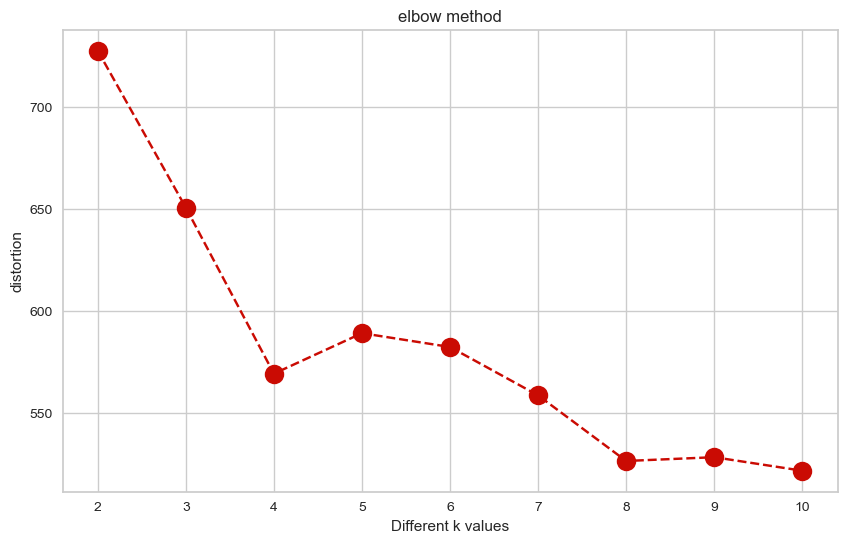

In [59]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=101)
    kmeanModel.fit(df_a_ss)
    distances = kmeanModel.transform(df_a_ss) 
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result)) 

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "ro--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [60]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(df_a_ss)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_a_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.4460311217292306
For n_clusters=6, the silhouette score is 0.44302997016616813
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43410800435629476
For n_clusters=9, the silhouette score is 0.41671999499926166
For n_clusters=10, the silhouette score is 0.4067757910331995


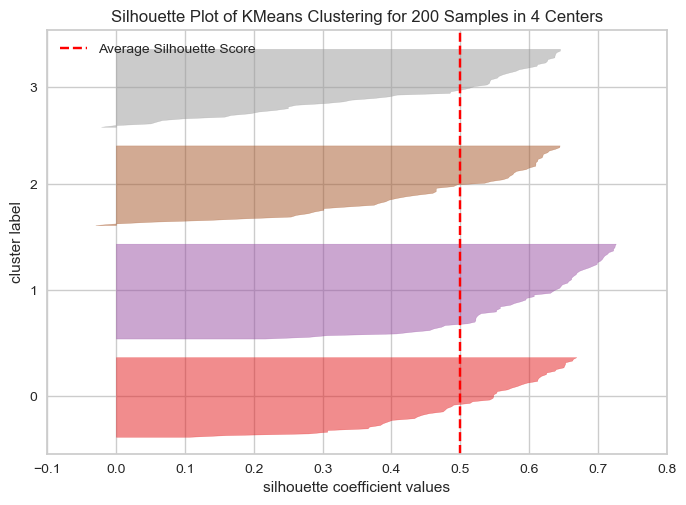

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
model_k = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model_k)

visualizer.fit(df_a_ss) 
visualizer.poof()

In [64]:
for i in range(model_k.n_clusters):
    label = (model_k.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


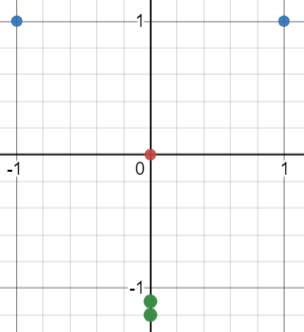

#### *iii. Apply K Means*

In [65]:
kmeans = KMeans(n_clusters=4, random_state=101)

In [66]:
kmeans.fit(df_a_ss)

KMeans(n_clusters=4, random_state=101)

In [70]:
df_a_ss_r = df_a_ss.copy()

In [71]:
df_a_ss_r["cluster_Kmeans"] = kmeans.fit_predict(df_a_ss)

In [72]:
df_a_ss_r

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

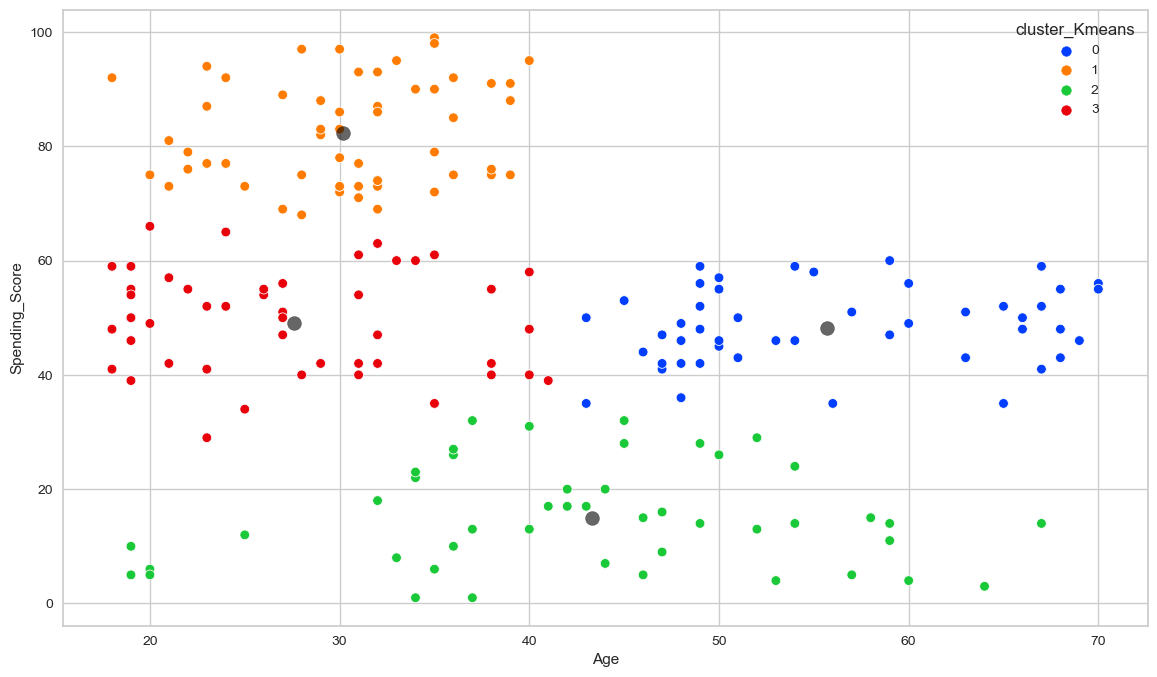

In [79]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_a_ss_r,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=100,
            alpha=0.6)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [80]:
df_ai_ss = df_c.drop(columns="Age")

In [81]:
df_ai_ss.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [82]:
hopkins(df_ai_ss, 1)

0.7097252202619594

#### *ii. Determine optimal number of clusters*

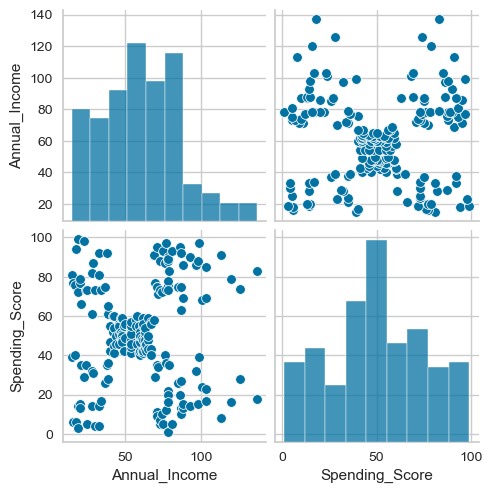

In [83]:
sns.pairplot(df_ai_ss)

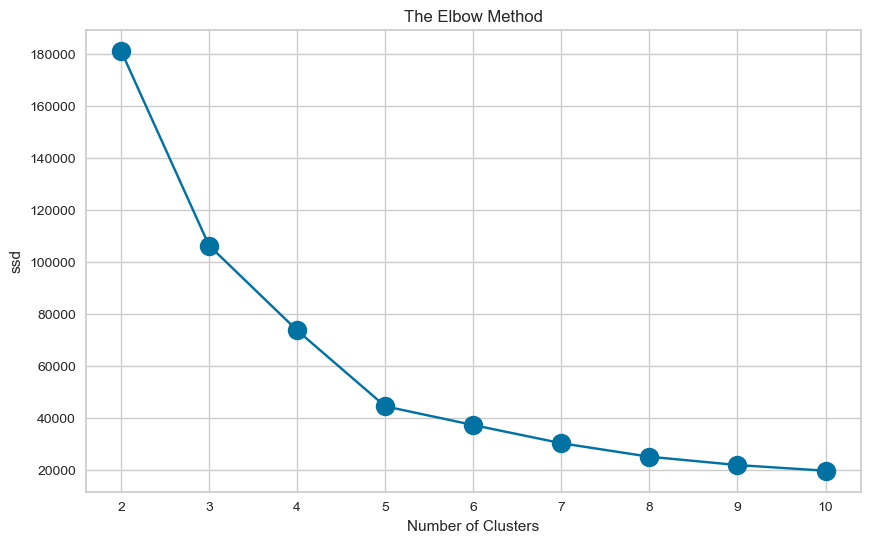

In [85]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=101)
    kmeans.fit(df_ai_ss)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

Text(0.5, 1.0, 'elbow method')

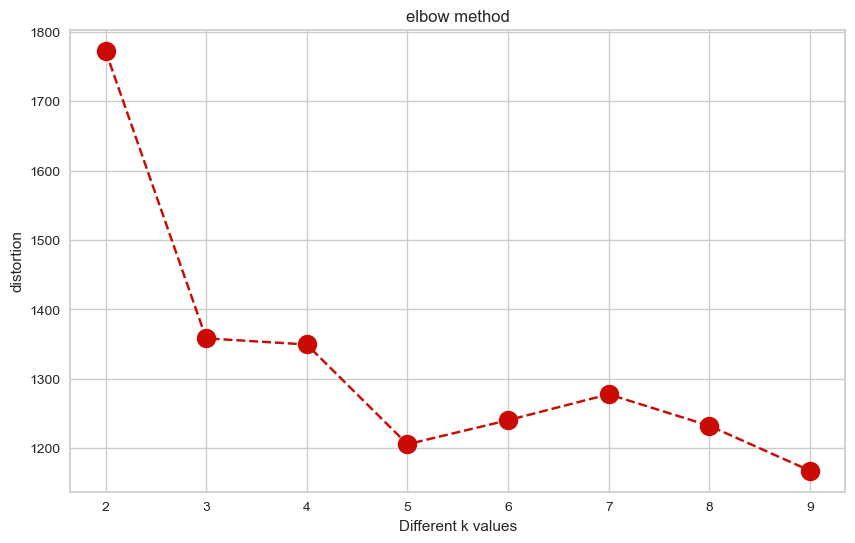

In [86]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=101)
    kmeanModel.fit(df_ai_ss)
    distances = kmeanModel.transform(df_ai_ss) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "ro--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [87]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(df_ai_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5281944387251989
For n_clusters=8, the silhouette score is 0.4564394045323282
For n_clusters=9, the silhouette score is 0.4595491760122954
For n_clusters=10, the silhouette score is 0.45310125985052596


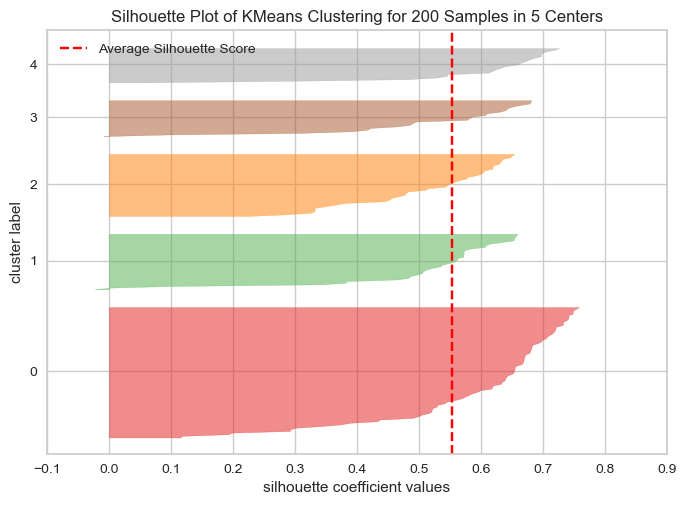

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
model_k2 = KMeans(n_clusters=5, random_state=101)
visualizer = SilhouetteVisualizer(model_k2)

visualizer.fit(df_ai_ss)  # Fit the data to the visualizer
visualizer.poof()

In [89]:
for i in range(model_k2.n_clusters):
    label = (model_k2.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5091706489322517
mean silhouette score for label 3    : 0.5122676140736505
mean silhouette score for label 4    : 0.5990128687006722
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [93]:
kmeans_model = KMeans(n_clusters=5, random_state=101)

In [94]:
kmeans_model.fit(df_ai_ss)

KMeans(n_clusters=5, random_state=101)

In [95]:
df_ai_ss_r = df_ai_ss.copy()

In [96]:
df_ai_ss_r['cluster_Kmeans'] = kmeans_model.fit_predict(df_ai_ss)

In [97]:
df_ai_ss_r

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

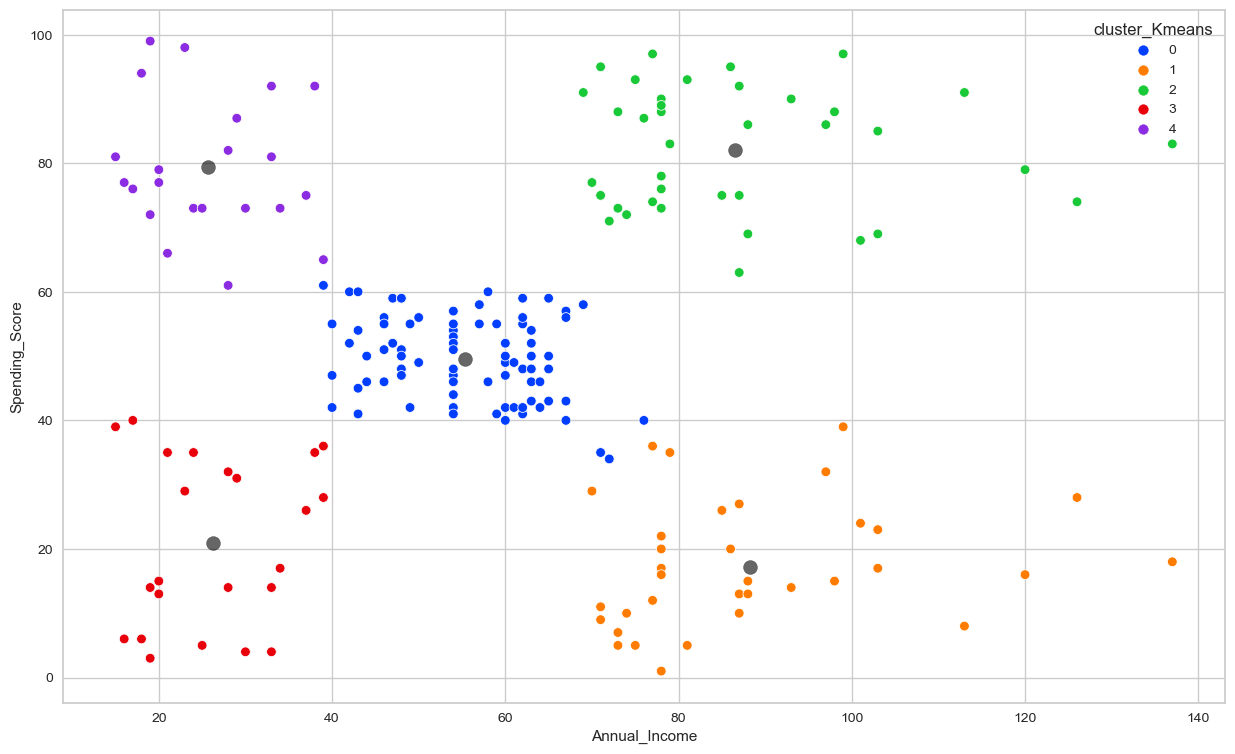

In [99]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss_r,
                palette="bright")
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=100,
            alpha=0.6)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [100]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=df_a_ss, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [101]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_a_ss)
    cluster_labels = Agg_model.labels_
    silhouette_avg = silhouette_score(df_a_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score- x2

In [102]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=df_ai_ss, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [103]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_ai_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [104]:
Agg1 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')


In [105]:
y_agg = Agg1.fit_predict(df_a_ss)

In [106]:
df_a_ss_r['cluster_Agg'] = y_agg


In [107]:
df_a_ss_r.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [108]:
Agg2 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')


In [109]:
y_agg2 = Agg2.fit_predict(df_ai_ss)

In [110]:
df_ai_ss_r['cluster_Agg'] = y_agg2


In [111]:
df_ai_ss_r.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,3,4
1,15,81,4,3
2,16,6,3,4
3,16,77,4,3
4,17,40,3,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

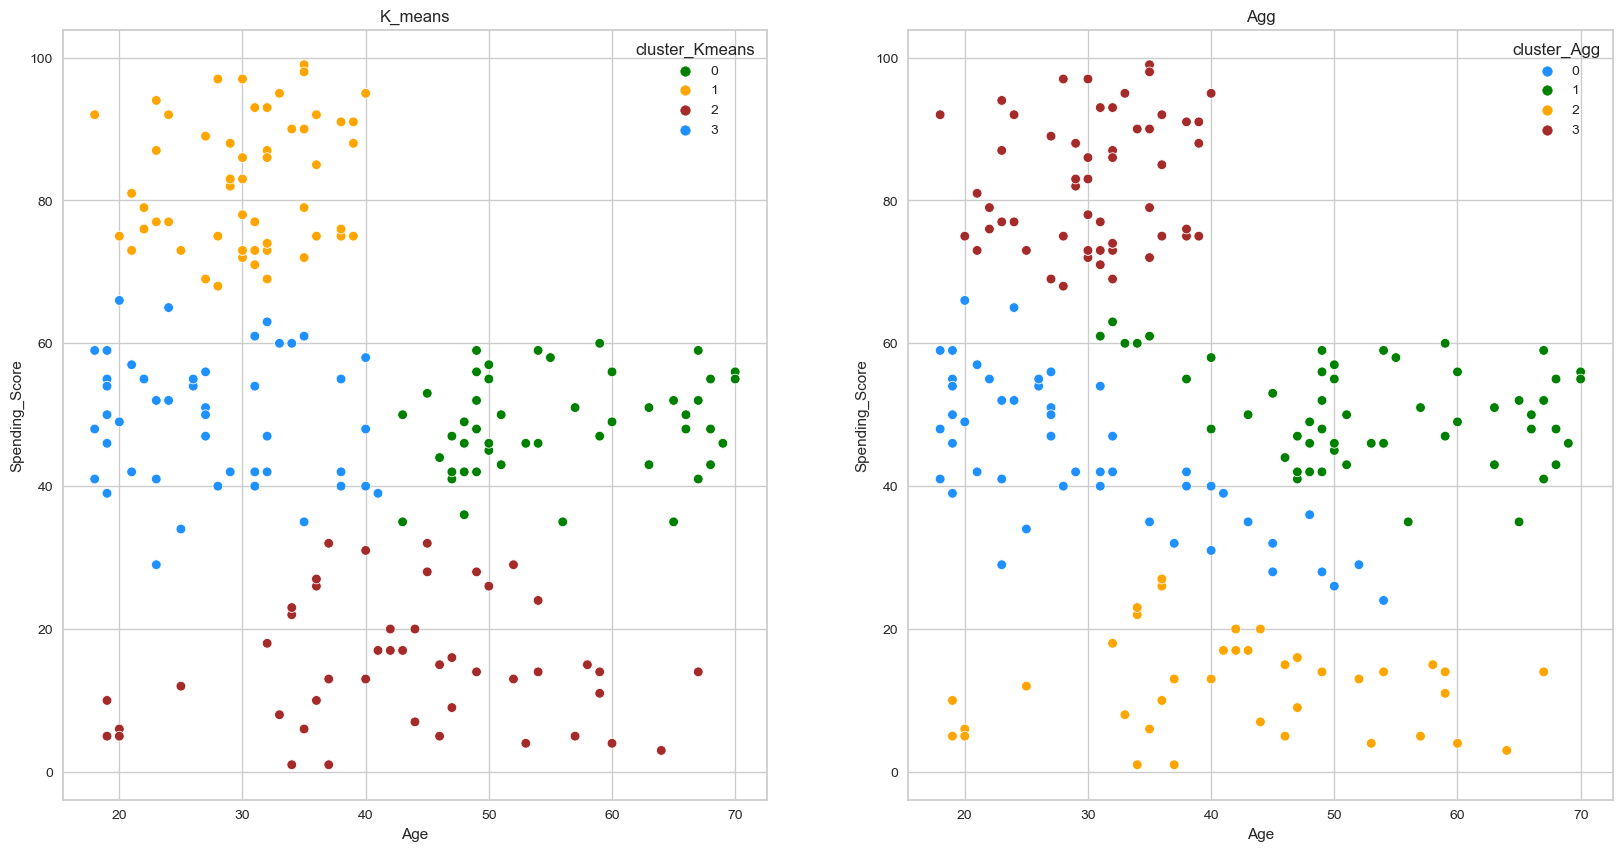

In [113]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_a_ss_r,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_a_ss_r,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

Text(0.5, 1.0, 'Agg')

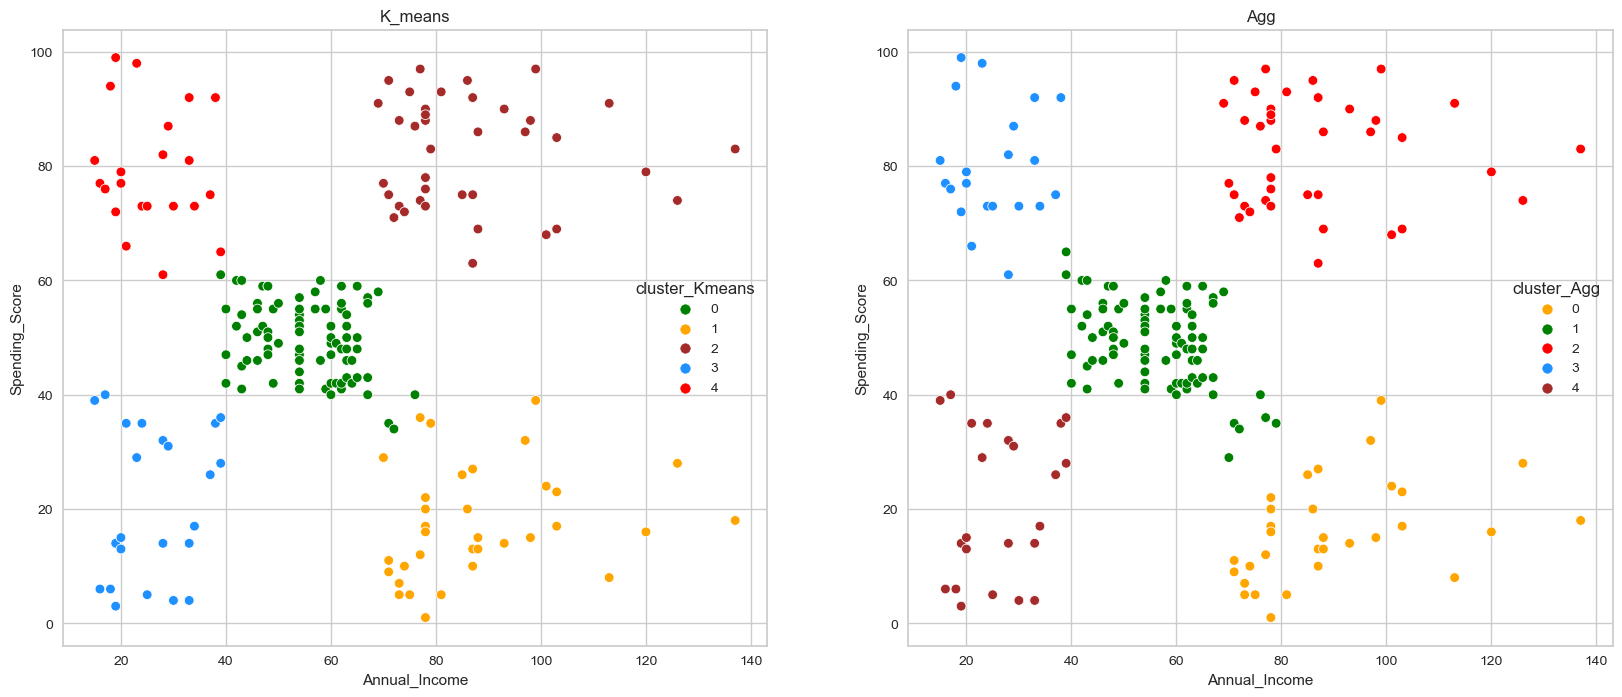

In [114]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_ai_ss_r,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_ai_ss_r,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

<Axes: >

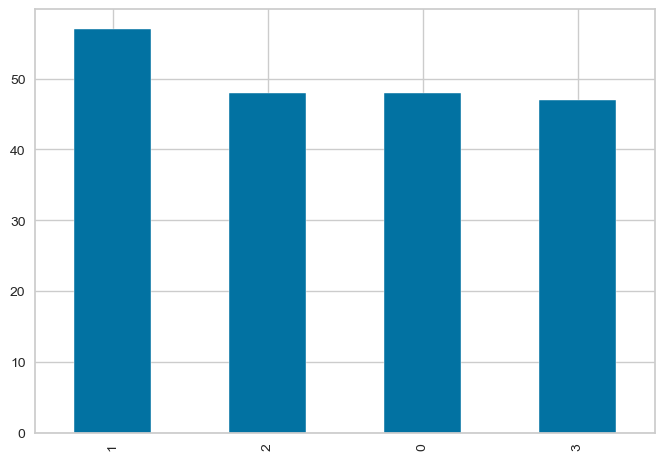

In [115]:
df_a_ss_r.cluster_Kmeans.value_counts().plot(kind='bar')

In [116]:
df["cluster_Age_Spending_Score"] = df_a_ss_r.cluster_Kmeans


In [117]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


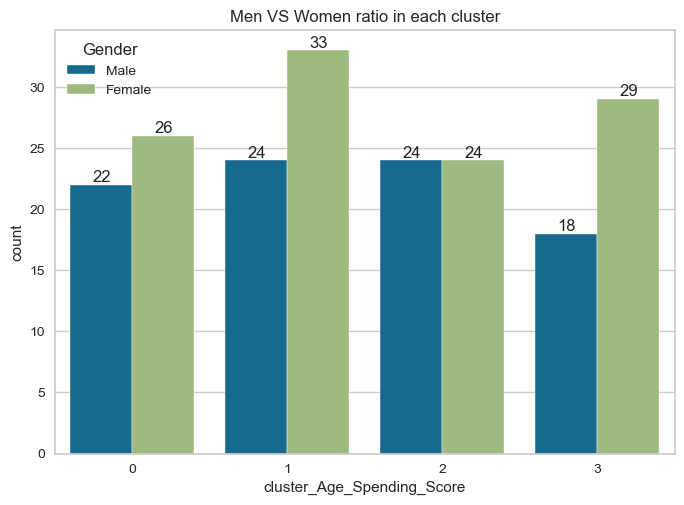

In [120]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [121]:
df.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,30.175439,66.070175,82.350877
2,43.291667,66.937500,15.020833
3,27.617021,53.276596,49.148936


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

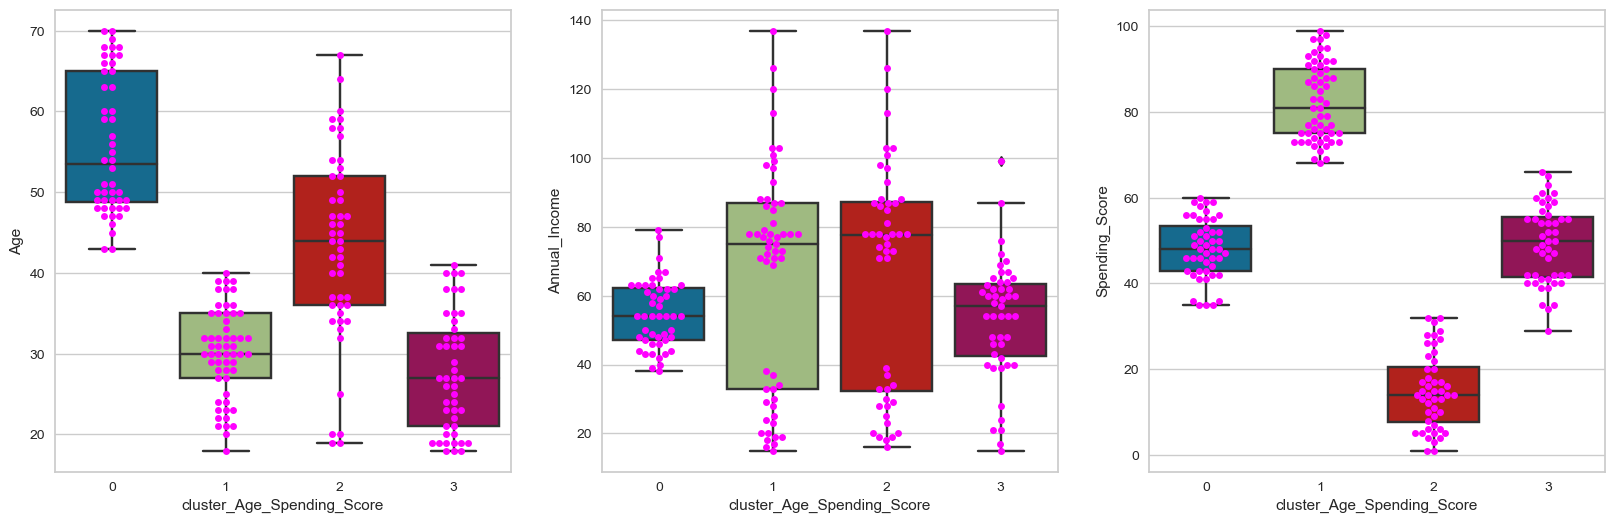

In [122]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

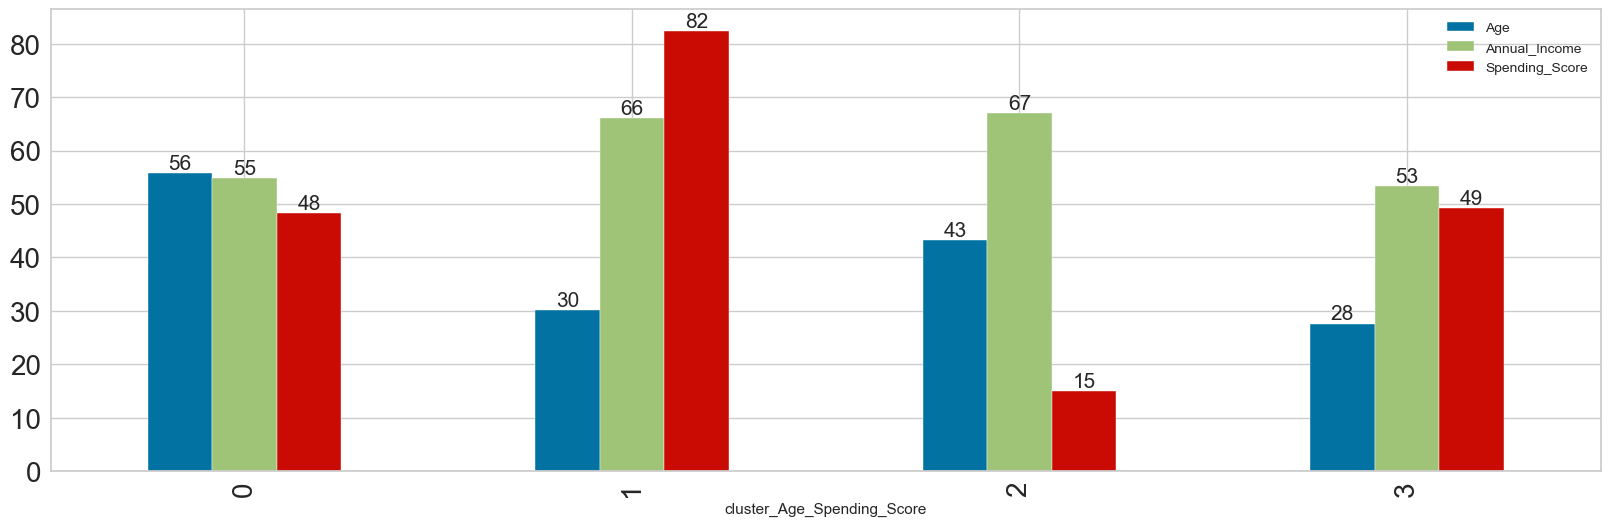

In [176]:
ax = df.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

**cluster 0** : The average age is around 56, both annual_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1** :The average age is around 30. The annual_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it. 

**cluster 2**: The average age is around 43, the annual_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.
  
**cluster 4**: The average age is around 28.both annual_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [124]:
df_ai_ss_r.cluster_Kmeans.value_counts()

0    81
2    39
1    35
3    23
4    22
Name: cluster_Kmeans, dtype: int64

[Text(0, 0, '81'),
 Text(0, 0, '39'),
 Text(0, 0, '35'),
 Text(0, 0, '23'),
 Text(0, 0, '22')]

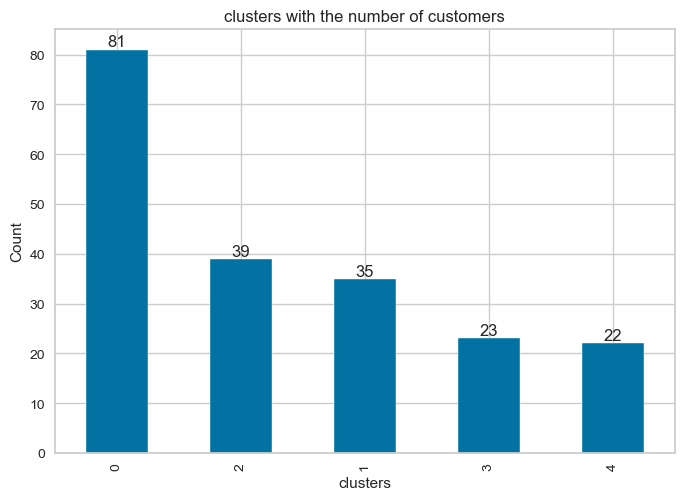

In [125]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss_r.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [126]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [128]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss_r.cluster_Kmeans

In [129]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


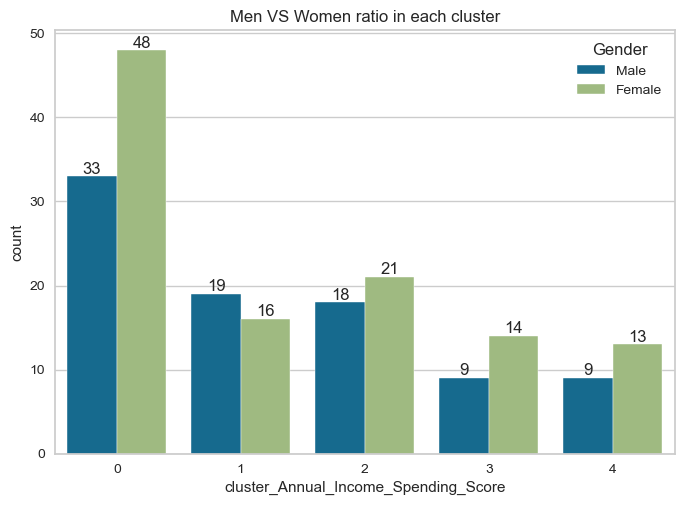

In [130]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [131]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     32.190476      86.047619   
       3                                     43.214286      27.357143   
       4                                     25.461538      25.692308   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     33.277778      87.111111   
       3                                     48.333333      24.666667   
       4                                     25.000000      25.777778   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          81.666667  
       3                                          21.714286  
       4                                          80.538462  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          82.666667  
       3                                          19.666667  
       4                                          77.666667

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

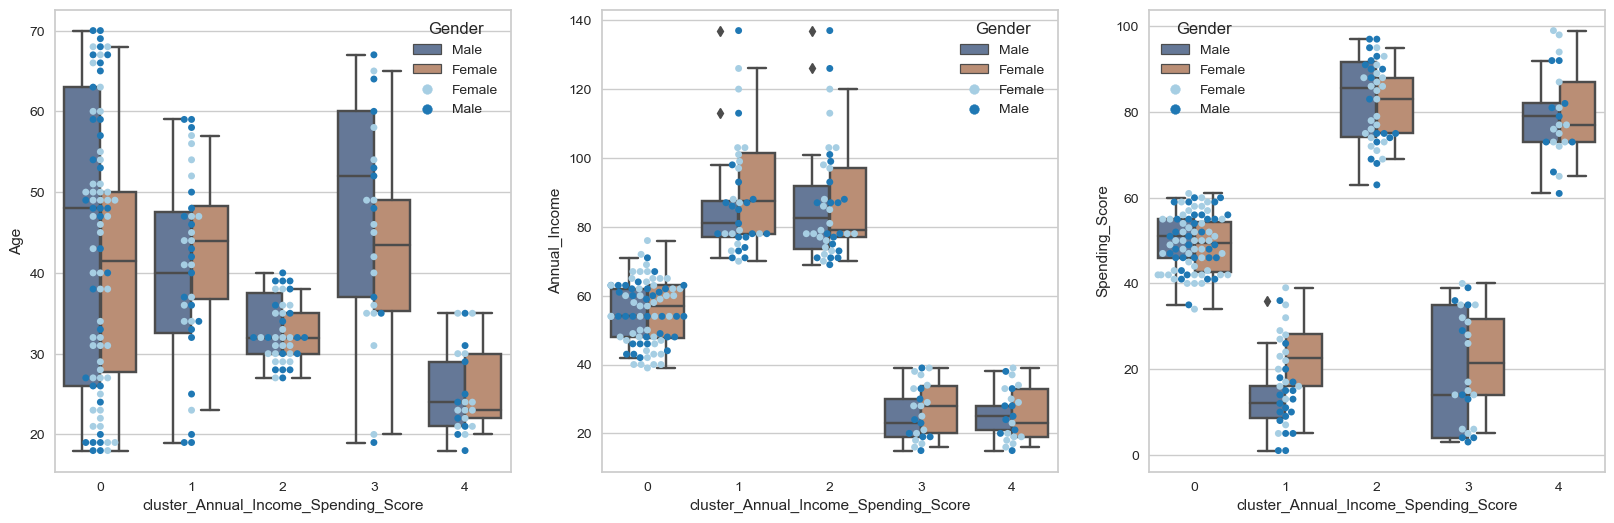

In [132]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

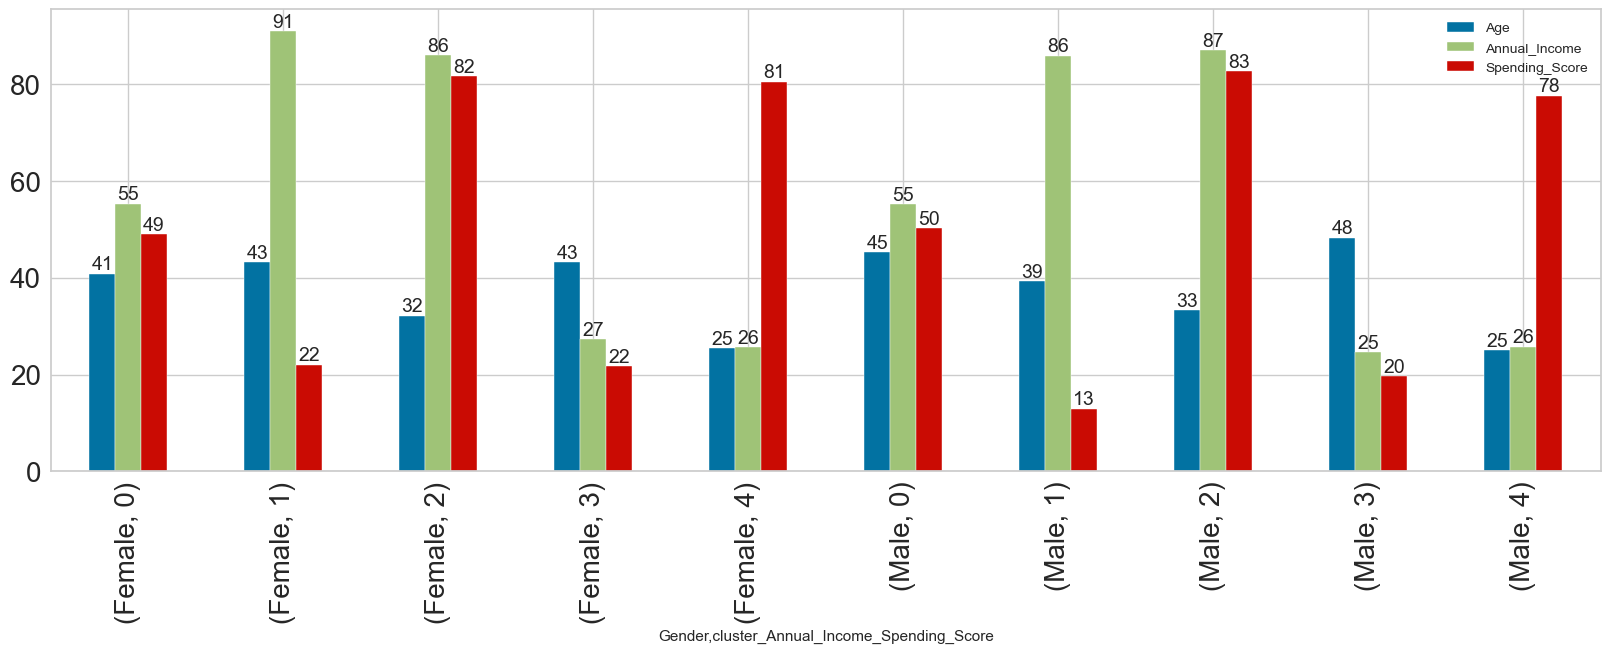

In [133]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.  

**cluster 2**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 3** :The average age is around 43. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 4**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group. 

**cluster 2**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 3** :The average age is around 48. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 4**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.



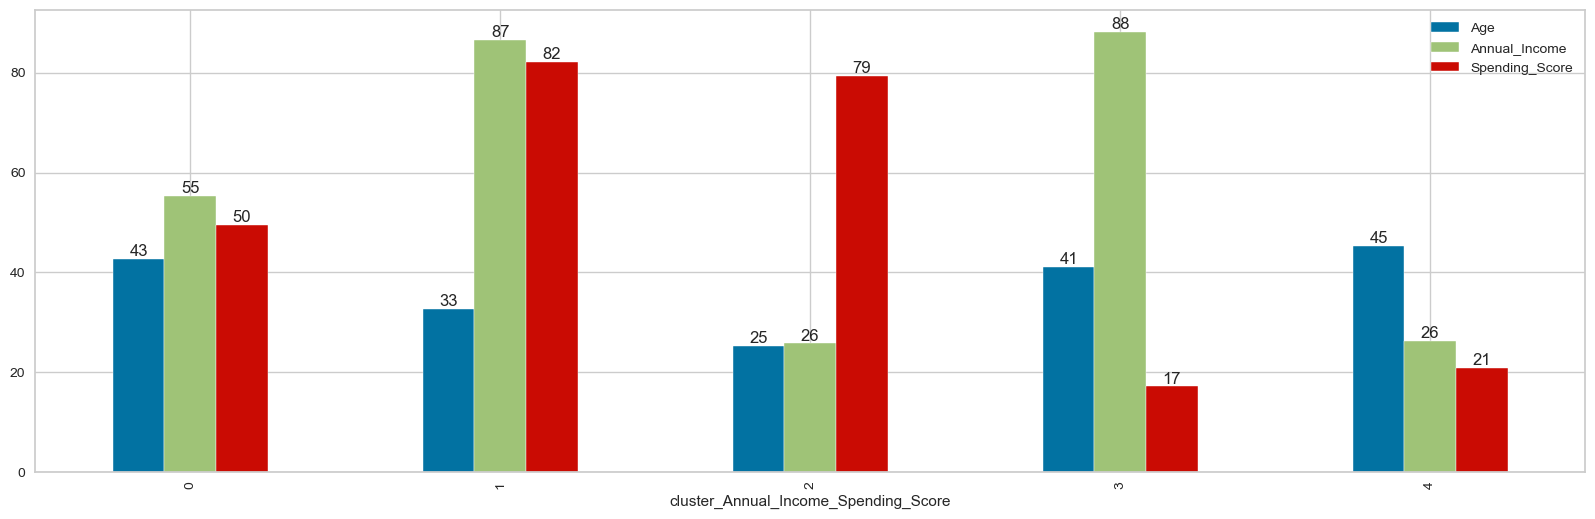

In [187]:
ax = df.drop(columns = 'Gender').groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 33, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 3**: The average age is around 45, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

**cluster 4** :The average age is around 41. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___